In [6]:
import numpy as np
import pandas as pd
import pylab
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib notebook

Let's start by creating some dataframes to test our PCA-based algorithm for sensitivity analysis.

<IPython.core.display.Javascript object>


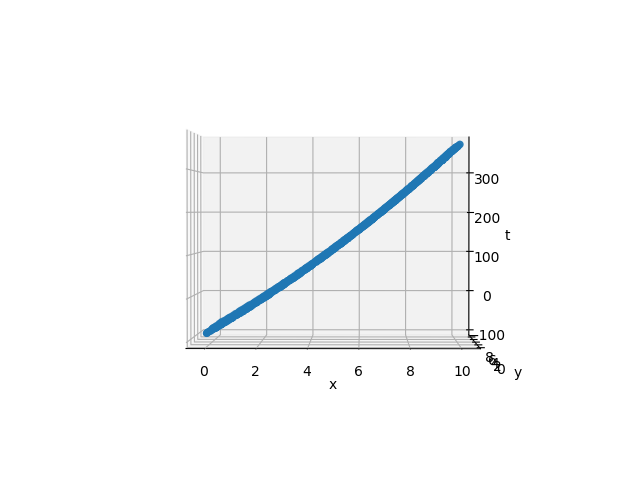

In [7]:
x = np.linspace(0,10,1000)
y = np.random.randint(low=0, high=10, size=1000)

# output - depends only on x
t = x**2 + 34*x - 81

df = pd.DataFrame({'x':x, 'y':y, 't':t})

df

figure = pylab.figure().gca(projection='3d')
figure.scatter(df['x'], df['y'], df['t'])
figure.set_xlabel('x')
figure.set_ylabel('y')
figure.set_zlabel('t')
pylab.show()

# Testing the algorithm

Now we will apply our algorithm to the created dataframe.

<IPython.core.display.Javascript object>


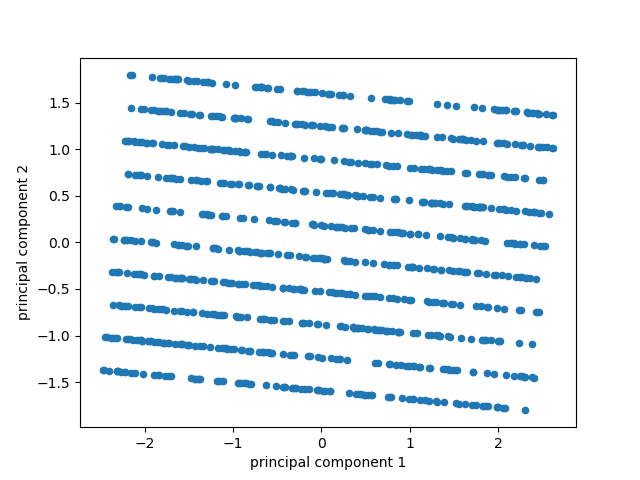

In [12]:
# standardizing the parameters and output
normalizedDf = StandardScaler().fit_transform(df)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(normalizedDf)

principalDf = pd.DataFrame(data=principal_components,
                          columns=['principal component 1', 'principal component 2'])

principalDf

principalDf.plot(kind='scatter', x='principal component 1', y='principal component 2')
pylab.show()

In [13]:
pca.explained_variance_ratio_

array([0.66878547, 0.33064123])

In [14]:
pca.components_

array([[ 0.7042567 ,  0.08923146,  0.70431545],
       [-0.06375997,  0.99601047, -0.06243237]])

# Second run

In [17]:
x = np.linspace(0,10,1000)
y = np.random.random_sample((1000,))
c = np.random.random_sample((1000,))
z = 3*c - 20 + 2**c

# output - depends only on x and z
t = x**2 + 34*z - 81

df = pd.DataFrame({'x':x, 'y':y, 'z':z, 't':t})

df


,x,y,z,t
0,0.00000,0.007714,-15.993809,-624.789519
1,0.01001,0.948287,-16.321130,-635.918332
2,0.02002,0.330294,-15.282976,-600.620796
3,0.03003,0.244831,-18.604587,-713.555040
4,0.04004,0.382120,-15.333693,-602.343945
...,...,...,...,...
995,9.95996,0.067961,-18.689752,-617.250779
996,9.96997,0.774028,-18.174369,-599.528243
997,9.97998,0.398963,-18.138935,-598.123778
998,9.98999,0.259372,-18.016619,-593.765146


<IPython.core.display.Javascript object>


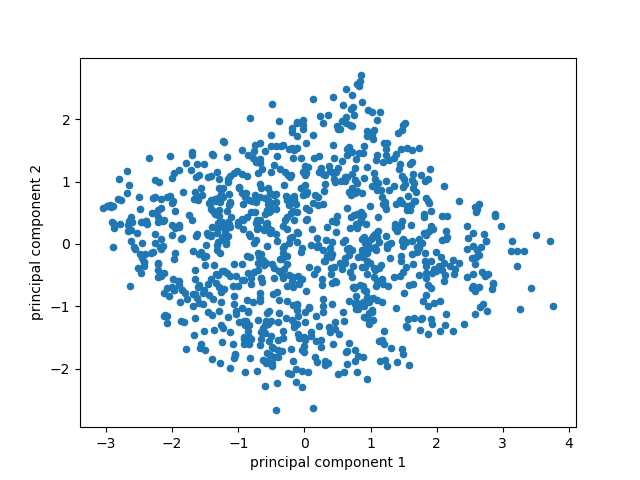

In [18]:
# standardizing the parameters and output
normalizedDf = StandardScaler().fit_transform(df)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(normalizedDf)

principalDf = pd.DataFrame(data=principal_components,
                          columns=['principal component 1', 'principal component 2'])

principalDf

principalDf.plot(kind='scatter', x='principal component 1', y='principal component 2')
pylab.show()

In [19]:
pca.explained_variance_ratio_

array([0.48278849, 0.2681935 ])

In [20]:
pca.components_

array([[ 0.39319232, -0.05551104,  0.57327251,  0.7167126 ],
       [-0.74239763,  0.38399416,  0.54898986, -0.00209267]])

# Result

This two runs give suspicion that the principal component 1 has a very low (in module) component in the axis of the parameter that does not influence the output. 